# Project 1
### Problem statement
For this project you must create a data set by simulating a real-world phenomenon of
your choosing. You may pick any phenomenon you wish – you might pick one that is
of interest to you in your personal or professional life. Then, rather than collect data
related to the phenomenon, you should model and synthesise such data using Python.

I've decided to look at the stack overflow annual survey for 2023 results of which are available here https://survey.stackoverflow.co/2023/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import io
from urllib.request import urlopen
import re

Download Stack Overflow Annual survey 2023

In [2]:
r = urlopen('https://cdn.stackoverflow.co/files/jo7n4k8s/production/49915bfd46d0902c3564fd9a06b509d08a20488c.zip/stack-overflow-developer-survey-2023.zip').read()
file = ZipFile(io.BytesIO(r))
df = pd.read_csv(file.open('survey_results_public.csv'))

Let's get rid of the columns we are not interested in.

In [3]:
df = df.drop(list(df)[23:83], axis=1)
df = df.drop(['ResponseId', 'Q120', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'DevType', 'OrgSize', 
              'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal'], axis = 1 )

I am interested in only developers likely to be in the job market, so 25 to 64 year olds will be close enough.

In [4]:
df.drop(df.loc[df['Age']=='18-24 years old'].index, inplace=True)
df.drop(df.loc[df['Age']=='Under 18 years old'].index, inplace=True)
df.drop(df.loc[df['Age']=='65 years or older'].index, inplace=True)
df.drop(df.loc[df['Age']=='Prefer not to say'].index, inplace=True)

I'm interested in python when it comes to languages so we'll create a row fpr those who used Python in the past year

In [5]:

df["worked_with_python"] = df["LanguageHaveWorkedWith"]
df["worked_with_python"] = np.where(df["worked_with_python"].str.contains('Python'), 'Y',df["worked_with_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df["worked_with_python"] = df["worked_with_python"].str.replace(regular_expression, '', regex=True)
df["worked_with_python"] = df["worked_with_python"].replace(r'^\s*$', 'N', regex=True)


Let's do the same for those who want to work with python in the future

In [6]:
df["want_to_python"] = df["LanguageWantToWorkWith"]
df["want_to_python"] = np.where(df["want_to_python"].str.contains('Python'), 'Y',df["want_to_python"])
chars_to_remove = ['Ada', 'Apex', 'APL', 'Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Clojure', 'Cobol', 'Crystal', 'Dart', 'Delphi', 
                   'Elixir', 'Erlang', 'F#', 'Flow', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 
                   'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Nim', 'Objective-C', 'OCaml', 'Perl', 'PHP', 'PowerShell', 'Prolog', 'R', 'Raku', 'Ruby', 
                   'Rust', 'SAS', 'Scala', 'Solidity', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)', 'Zig', ';']
regular_expression = '[' + re.escape (''. join (chars_to_remove)) + ']'
df["want_to_python"] = df["want_to_python"].str.replace(regular_expression, '', regex=True)
df["want_to_python"] = df["want_to_python"].replace(r'^\s*$', 'N', regex=True)

Create a function to reuse this code

let's drop the old language columns

In [7]:
df = df.drop(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'], axis = 1 )
df.head(2)

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,YearsCode,YearsCodePro,ConvertedCompYearly,worked_with_python,want_to_python
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,285000.0,Y,N
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,250000.0,N,N


graphs


N    35513
Y    29992
Name: worked_with_python, dtype: int64


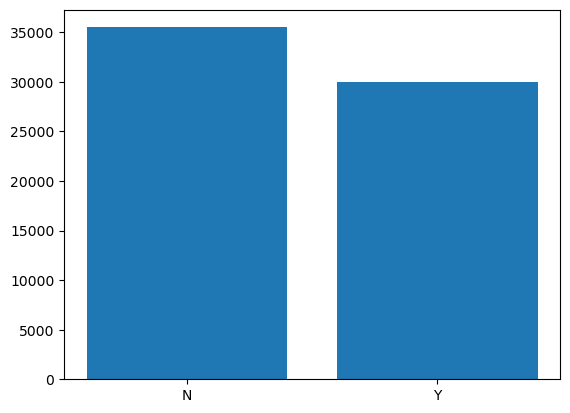

In [8]:
counts = df["worked_with_python"].value_counts()
print(counts)
unique = 'N', 'Y'
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

N    35297
Y    30208
Name: want_to_python, dtype: int64


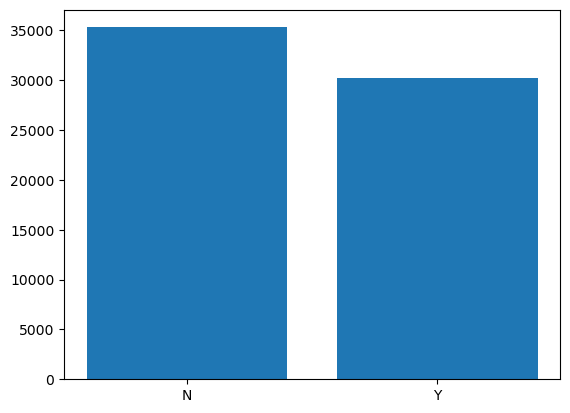

In [9]:
counts1 = df["want_to_python"].value_counts()
print(counts1)
unique = 'N', 'Y'
# we can now put this into a Bar Chart
plt.bar(unique, counts1)
plt.show()

In [10]:
counts = df["Age"].value_counts()
print(counts)

25-34 years old    33247
35-44 years old    20532
45-54 years old     8334
55-64 years old     3392
Name: Age, dtype: int64


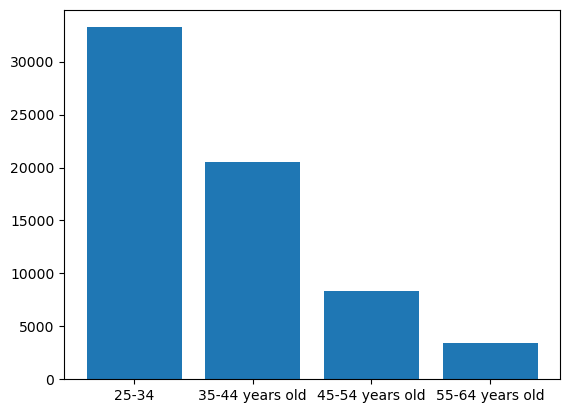

In [11]:
counts = df["Age"].value_counts()
unique = '25-34', '35-44 years old', '45-54 years old', '55-64 years old' 
# we can now put this into a Bar Chart
plt.bar(unique, counts)
plt.show()

In [12]:
#YearsCode

df["YearsCode"] = np.where(df["YearsCode"].str.contains('NA'), '0.0',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('Less than 1 year'), '0.5',df["YearsCode"])
df["YearsCode"] = np.where(df["YearsCode"].str.contains('More than 50 years'), '51.0',df["YearsCode"])
counts = df["YearsCode"].value_counts().rename_axis('unique_values').reset_index(name='counts')
counts['unique_values'] = pd.to_numeric(counts['unique_values'], errors='coerce')
counts = counts.sort_values(by=['unique_values'])
print(counts)

    unique_values  counts
23            0.0    1016
34            0.5     422
31            1.0     490
25            2.0     879
18            3.0    1382
16            4.0    1540
9             5.0    2265
12            6.0    2153
5             7.0    2718
3             8.0    3210
8             9.0    2296
0            10.0    5326
11           11.0    2157
4            12.0    3164
7            13.0    2465
10           14.0    2199
1            15.0    4266
14           16.0    1814
17           17.0    1529
15           18.0    1686
26           19.0     824
2            20.0    3983
27           21.0     757
20           22.0    1203
19           23.0    1320
24           24.0     952
6            25.0    2659
29           26.0     702
30           27.0     700
28           28.0     711
37           29.0     321
13           30.0    2007
42           31.0     269
33           32.0     439
32           33.0     480
38           34.0     320
22           35.0    1080
40          

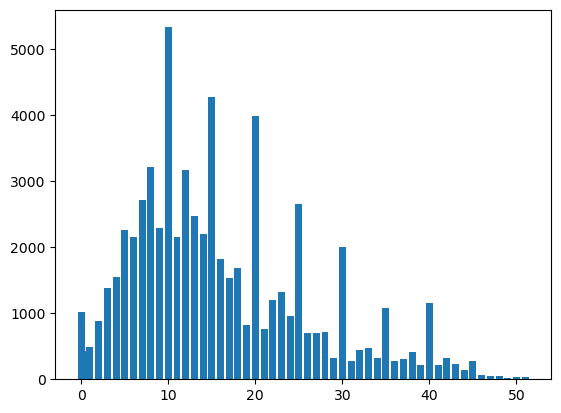

In [13]:
unique = counts['unique_values']
count1 = counts['counts']
plt.bar(unique, count1)
plt.show()